## Regresión Logistica con Dataset Heart_ds_big (319795 datos)

#1. Importar Librerias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
import math

# 2. Cargar Dataset

Dataset tomado de Kaggle: https://www.kaggle.com/datasets/opeyemiawe/heart-2020

In [ ]:
Heart_ds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/heart_Project_Fn.csv')

# Visualizar DataFrame Heart_ds
Heart_ds.head(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


# 3. Variables del dataset

| Variable | Descripción | Valores | Unidad |
|---|---|---|---|
| **HeartDisease** | Indica si la persona ha sido diagnosticada con enfermedades cardíacas. | Sí, No | Categórica |
| **BMI** | Índice de Masa Corporal, una medida de grasa corporal basada en el peso y la altura de una persona. | Decimal (típicamente 10-50) | kg/m² |
| **Smoking** | Indica si la persona fuma actualmente. | Sí, No | Categórica |
| **AlcoholDrinking** | Indica si la persona consume alcohol en exceso. | Sí, No | Categórica |
| **Stroke** | Indica si la persona ha sufrido un accidente cerebrovascular. | Sí, No | Categórica |
| **PhysicalHealth** | Número de días en el último mes en los que la persona reportó tener problemas de salud física (lesiones o enfermedades). | Entero (0-30) | Días |
| **MentalHealth** | Número de días en el último mes en los que la persona reportó tener problemas de salud mental. | Entero (0-30) | Días |
| **DiffWalking** | Indica si la persona tiene serias dificultades para caminar o subir escaleras. | Sí, No | Categórica |
| **Sex** | Sexo biológico de la persona. | Masculino, Femenino | Categórica |
| **AgeCategory** | Rango de edad de la persona. | 18-24, 25-29, 30-34, ..., 80 o mayor | Categórica |
| **Race** | Raza de la persona. | Blanca, Negra, Asiática, India Americana/Nativa de Alaska, Otra, Hispana | Categórica |
| **Diabetic** | Indica si la persona tiene diabetes. | Sí, No, Diabetes límite, Durante el embarazo | Categórica |
| **PhysicalActivity** | Indica si la persona reportó hacer actividad física o ejercicio durante los últimos 30 días, aparte de su trabajo regular. | Sí, No | Categórica |
| **GenHealth** | Salud general de la persona. | Excelente, Muy buena, Buena, Regular, Mala | Categórica |
| **SleepTime** | Número promedio de horas de sueño por noche. | Entero | Horas |
| **Asthma** | Indica si la persona tiene asma. | Sí, No | Categórica |
| **KidneyDisease** | Indica si la persona tiene enfermedad renal. | Sí, No | Categórica |
| **SkinCancer** | Indica si la persona tiene cáncer de piel. | Sí, No | Categórica |

#4. Analisis Exploratorio de datos

In [ ]:
#visualizar la forma del DataFrame Heart_ds
print(Heart_ds.shape)

(319795, 18)


In [ ]:
# Visualizar info del DataFrame Heart_ds
Heart_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
# Visualizar datos en blanco del DataFrame Heart_ds
datos_blanco = pd.DataFrame({
'Registros en Blanco' : Heart_ds.isna().sum(),
'% Registros en Blanco' : Heart_ds.isna().sum()/len(Heart_ds)
})
datos_blanco

,Registros en Blanco,% Registros en Blanco
HeartDisease,0,0.0
BMI,0,0.0
Smoking,0,0.0
AlcoholDrinking,0,0.0
Stroke,0,0.0
PhysicalHealth,0,0.0
MentalHealth,0,0.0
DiffWalking,0,0.0
Sex,0,0.0
AgeCategory,0,0.0


In [ ]:
# Visualizar las descripcion estadistica del DataFrame Heart_ds
print(Heart_ds.describe())

                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000


In [ ]:
#Visualizar Distribución de las categorias
print(Heart_ds.groupby("HeartDisease").size())

HeartDisease
No     292422
Yes     27373
dtype: int64


**Comentarios:**



*  El conjunto de datos Heart_ds contiene 319795 registros y 18 columnas.
*   No hay datos faltantes en el conjunto de datos.

*   Las variables numéricas tienen diferentes rangos y distribuciones.
*   Las categorias binarias de la variable HeartDisease estan muy desbalanceadas




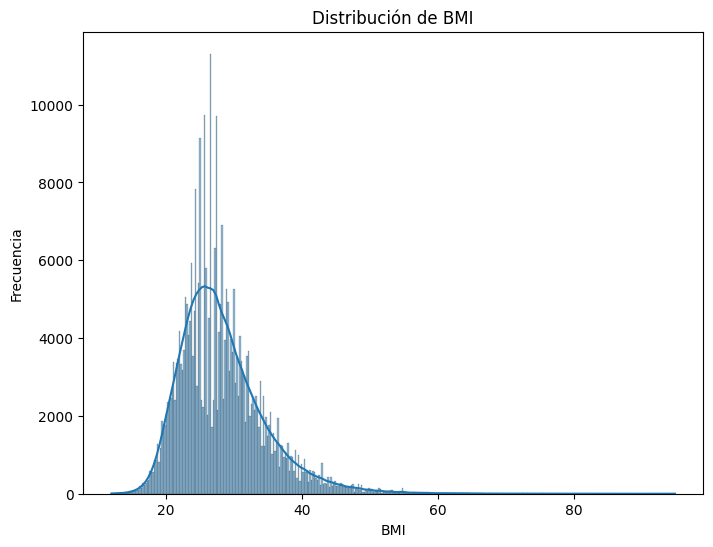

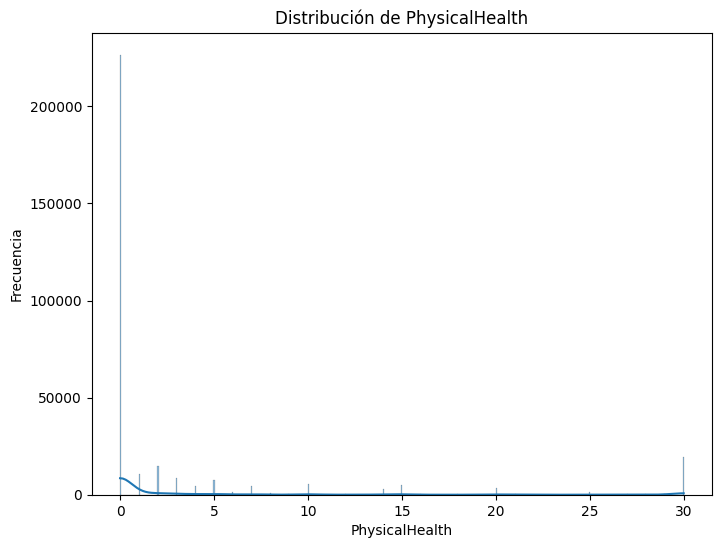

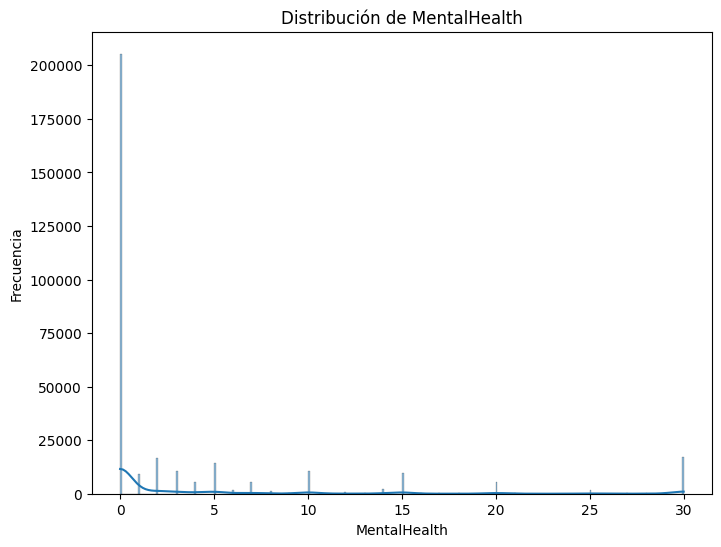

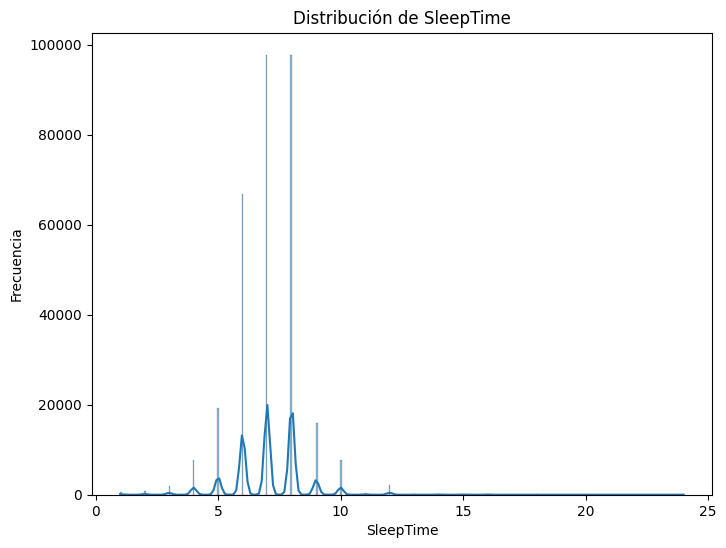

In [ ]:
# Visualizar la distibucion de los datos de las variables numericas

#Método 1: Histogramas

numerical_features = Heart_ds.select_dtypes(include=['number']).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
    sns.histplot(Heart_ds[feature], kde=True)  # kde=True agrega una curva de densidad
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.show()

<Figure size 1900x1200 with 0 Axes>

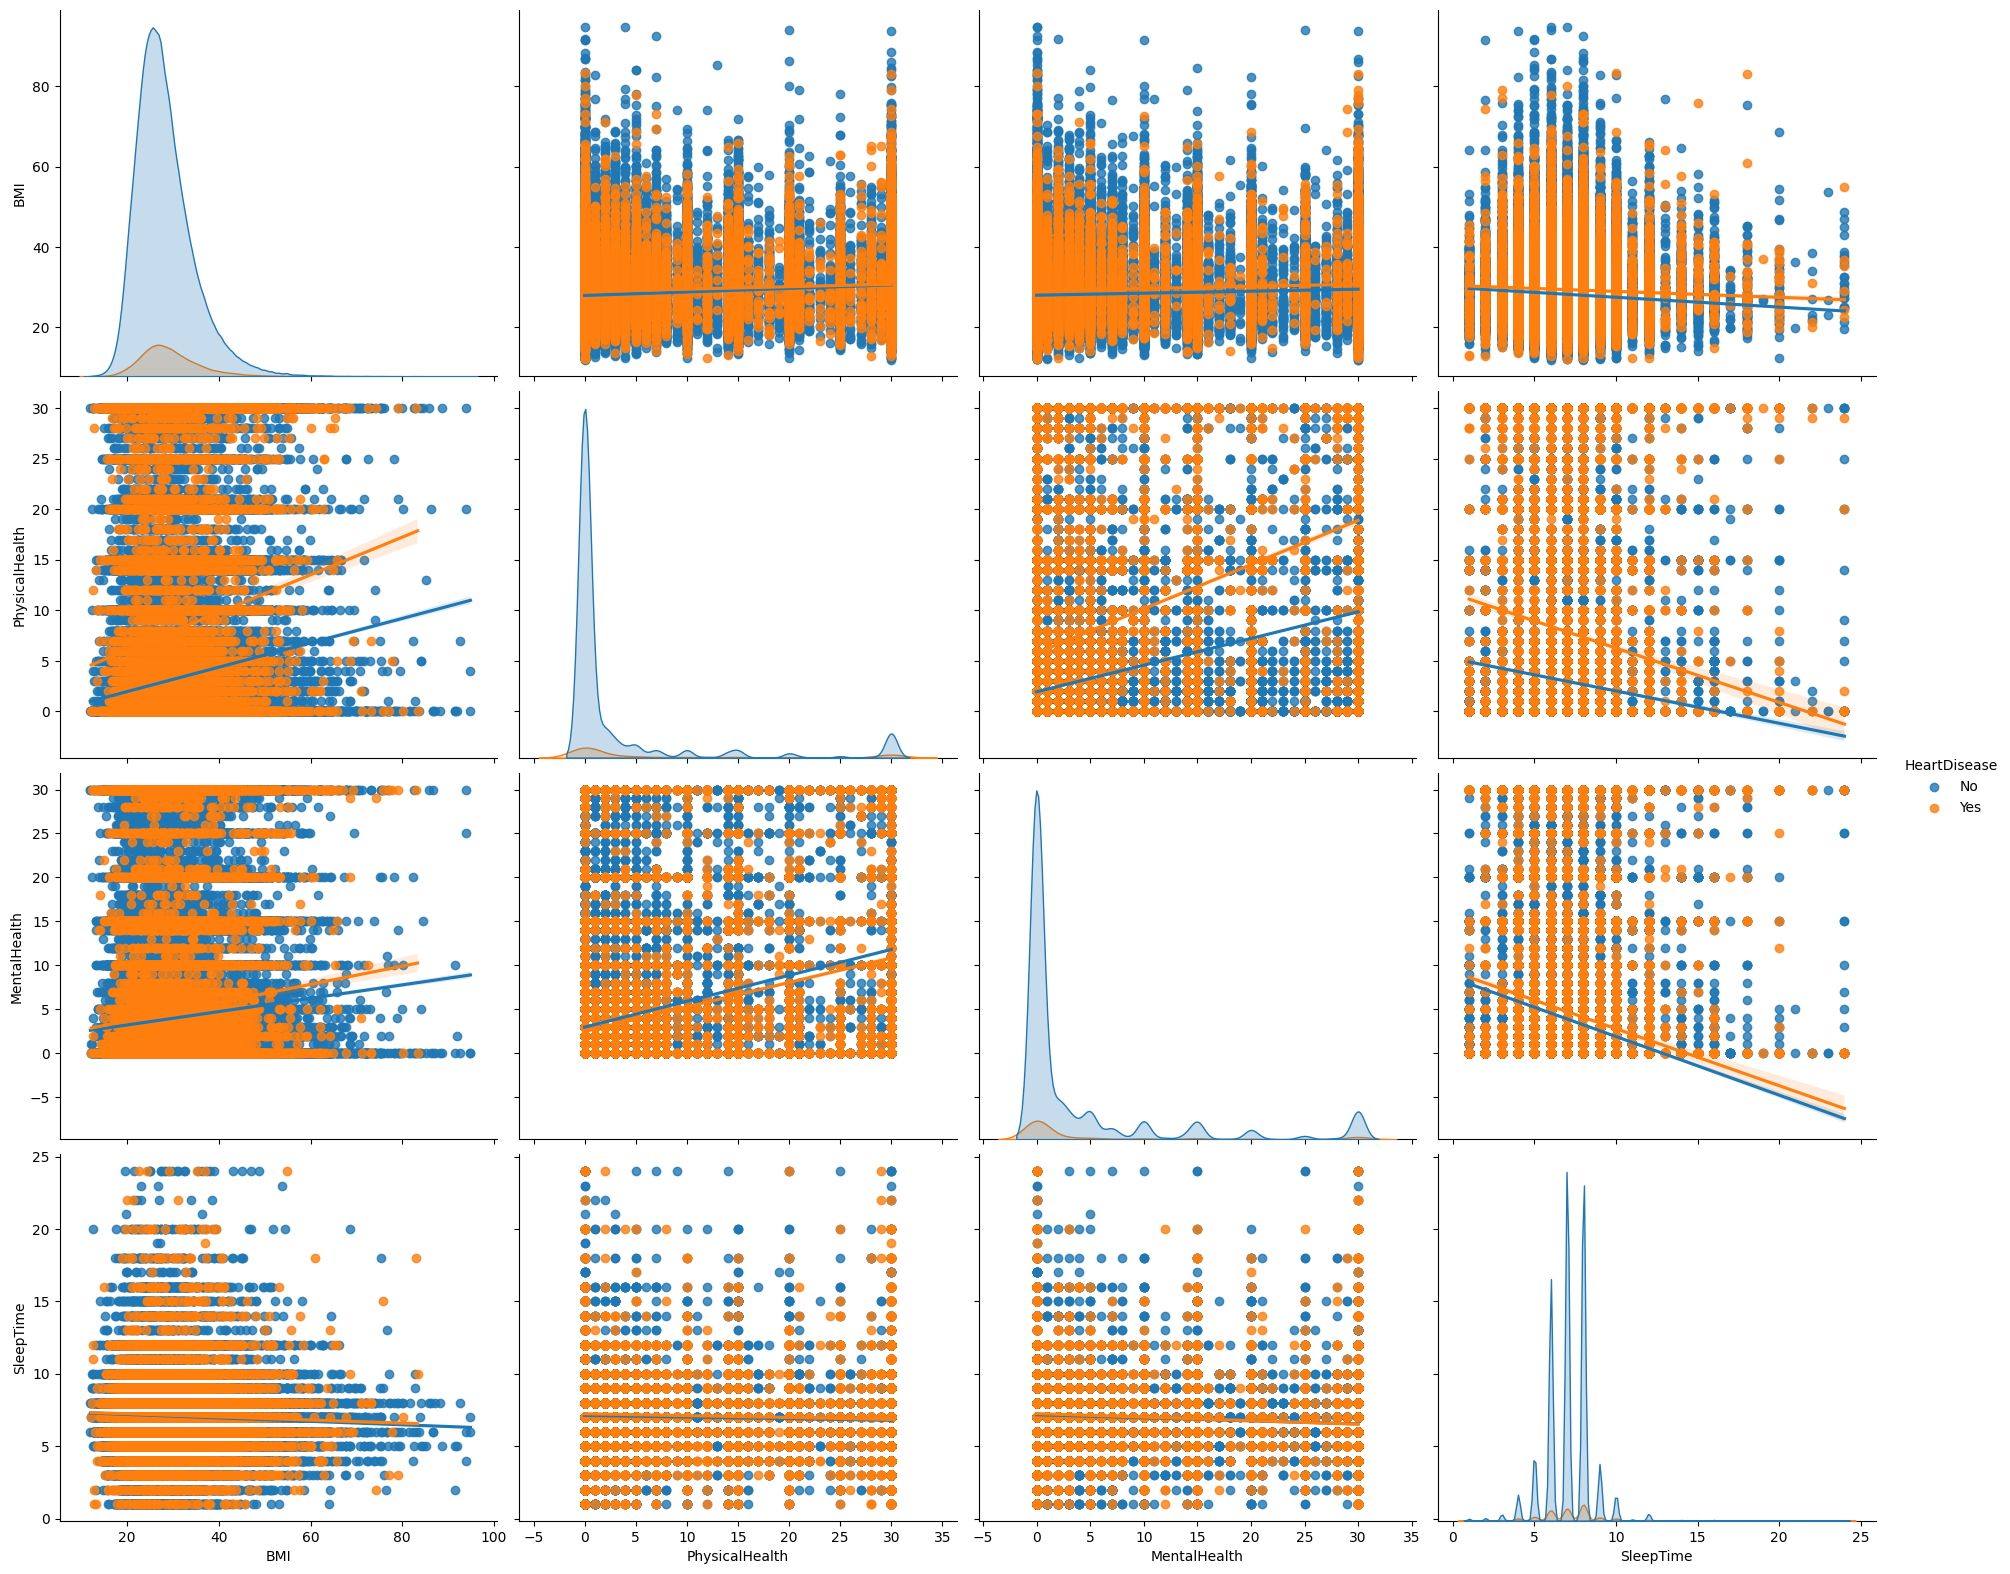

In [ ]:
#Visualizar Grafico de Dispersión de los datos

plt.figure(figsize=(19, 12))
sns.pairplot(Heart_ds.dropna(), hue="HeartDisease", height=4, aspect=1.2, vars=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], kind="reg")
plt.show()


El gráfico de dispersión sugiere que la edad, la presión arterial en reposo y la depresión del ST inducida por el ejercicio (Oldpeak) podrían estar relacionadas con la presencia de enfermedad cardíaca.

### Prompt Gemini: Ayudame a hacer un arreglo para convertir las variables categoricas a Numericas

In [ ]:
#Arreglo de los datos categoricos

# Convertir 'HeartDisease' a numérica
Heart_ds['HeartDisease'] = Heart_ds['HeartDisease'].replace({'No': 0, 'Yes': 1})

# Convertir 'GenHealth' a numérica con escala
Heart_ds['GenHealth'] = Heart_ds['GenHealth'].replace({
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very good': 4,
    'Excellent': 5
})

# Obtener lista de características categóricas restantes
categorical_features = Heart_ds.select_dtypes(include=['object']).columns

# Realizar codificación one-hot en características categóricas restantes
Heart_ds_encoded = pd.get_dummies(Heart_ds, columns=categorical_features)

<ipython-input-11-d517628fa842>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Heart_ds['HeartDisease'] = Heart_ds['HeartDisease'].replace({'No': 0, 'Yes': 1})
<ipython-input-11-d517628fa842>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Heart_ds['GenHealth'] = Heart_ds['GenHealth'].replace({


In [ ]:
Heart_ds_encoded.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,GenHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_No,PhysicalActivity_Yes,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,4,5.0,False,True,True,False,...,True,False,False,True,False,True,True,False,False,True
1,0,20.34,0.0,0.0,4,7.0,True,False,True,False,...,False,False,False,True,True,False,True,False,True,False
2,0,26.58,20.0,30.0,2,8.0,False,True,True,False,...,True,False,False,True,False,True,True,False,True,False
3,0,24.21,0.0,0.0,3,6.0,True,False,True,False,...,False,False,True,False,True,False,True,False,False,True
4,0,23.71,28.0,0.0,4,8.0,True,False,True,False,...,False,False,False,True,True,False,True,False,True,False


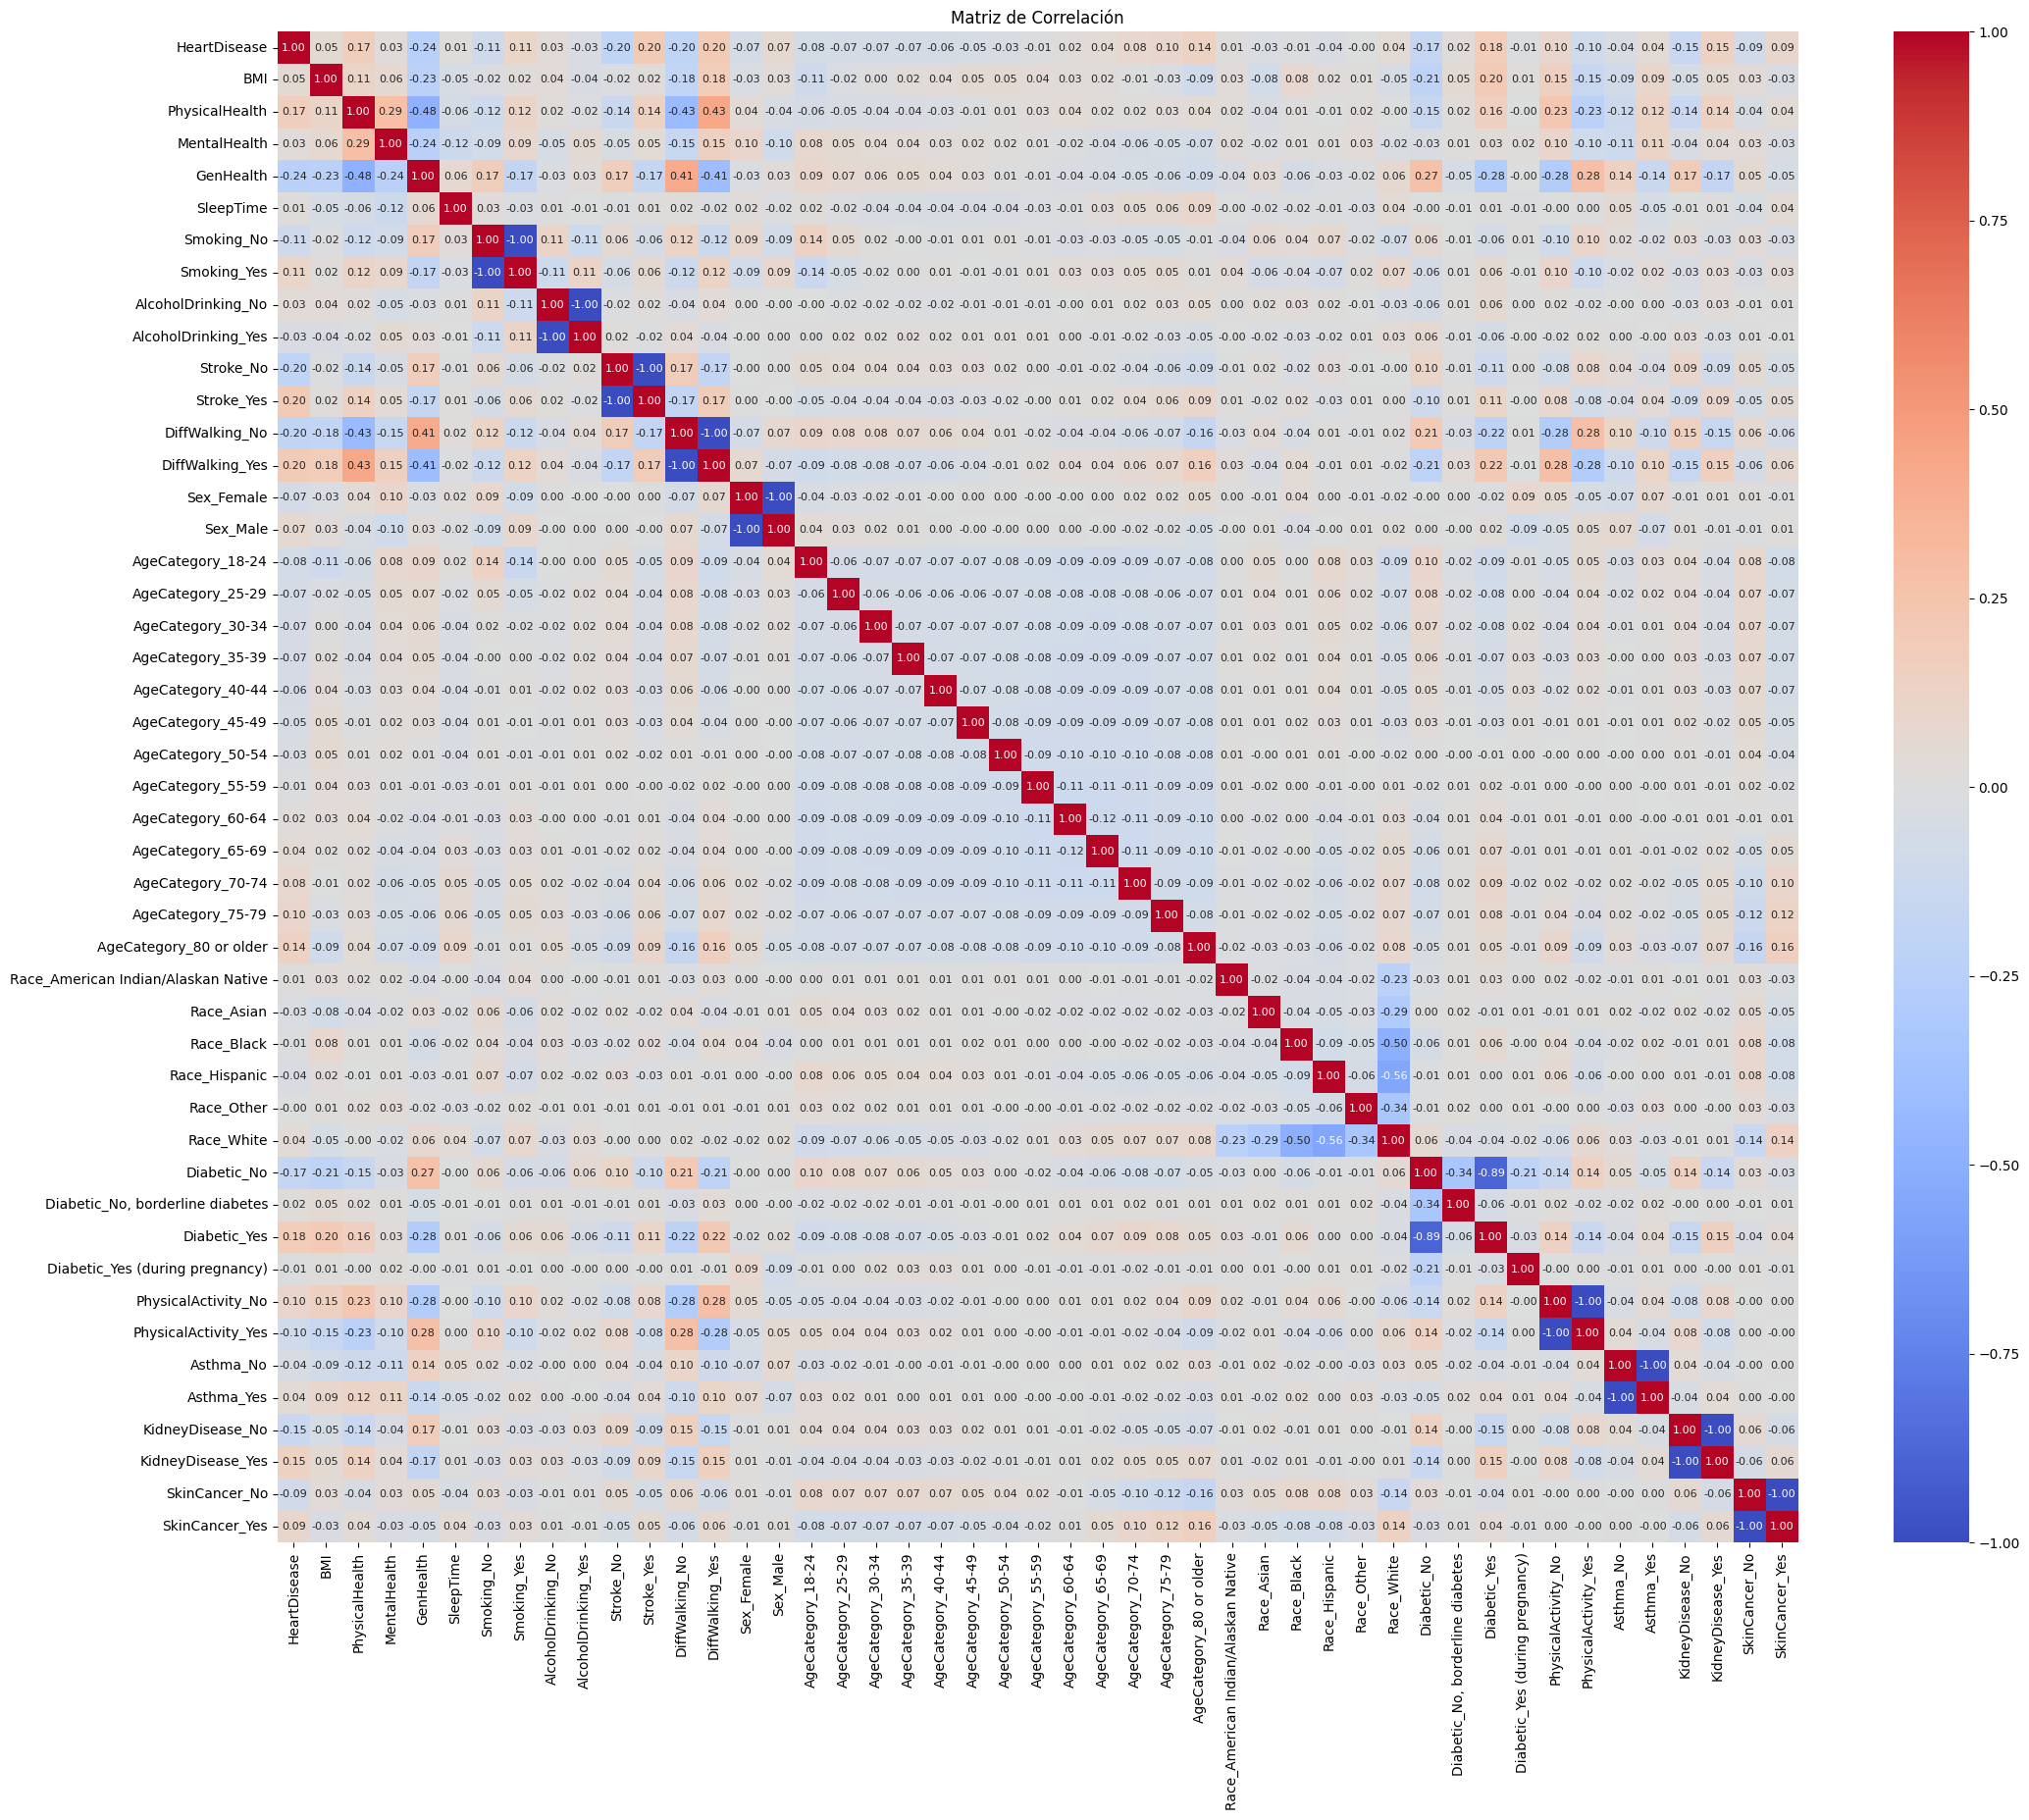

In [ ]:
# visualizar la matriz de confusión



# Calcula la matriz de correlación
corr_matrix = Heart_ds_encoded.corr()

# Grafica la matriz de correlación usando un mapa de calor
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Matriz de Correlación')
plt.show()


**Comentario**

* La mayoría de las correlaciones son débiles o moderadas. No hay correlaciones extremadamente fuertes entre las variables.
*  Las variables relacionadas con el estilo de vida, como fumar, la diabetes, la dificultad para caminar y el historial de derrames cerebrales, muestran correlaciones positivas débiles con la enfermedad cardíaca.



#5. Definir datos de entrenamiento y prueba

In [ ]:
X = Heart_ds_encoded.drop('HeartDisease', axis=1)
y = Heart_ds_encoded['HeartDisease']

In [ ]:
#Visualizar distribución de los datos

print(X.shape)
print(y.shape)

(319795, 46)
(319795,)


## 5.1. División de los datos de entrenamiento

In [ ]:
#Dividir datos en conjunto de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

# validando los resultados
print("Tamaño de X_train=", X_train.shape)
print("Tamaño de X_test=", X_test.shape)
print("Tamaño de y_train=", y_train.shape)
print("Tamaño de y_test=", y_test.shape)

Tamaño de X_train= (239846, 46)
Tamaño de X_test= (79949, 46)
Tamaño de y_train= (239846,)
Tamaño de y_test= (79949,)


#6. Modelo de regresión Logistica

## 6.1. Modelo sklear_model

### 6.1.1. Creación y Entrenamiento del modelo


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Predecir datos con los set de entrenamiento y prueba

y_test_pred = model.predict(X_test)
print(y_test_pred)

[0 0 0 ... 0 0 0]


## 6.1.2. Evaluación del modelo

* Cálcular y Gráficar la Matriz de Confusión

<Axes: >

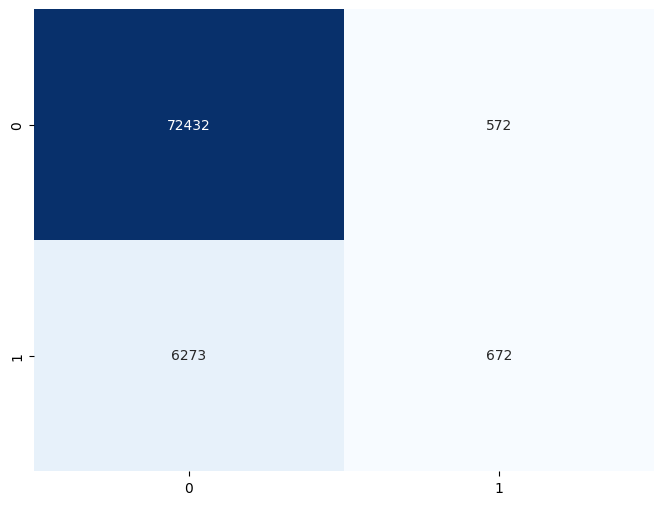

In [ ]:
# Calcula la matriz de confusión.
cm = confusion_matrix(y_test, y_test_pred)

# Visualiza la matriz de confusión.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)



In [ ]:
#Obtener el reporte de la rendimiento de la Matriz de Confusión
targer_names = ['0', '1']
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.92      0.99      0.95     73004
           1       0.54      0.10      0.16      6945

    accuracy                           0.91     79949
   macro avg       0.73      0.54      0.56     79949
weighted avg       0.89      0.91      0.89     79949



* Obtener la Curva ROC

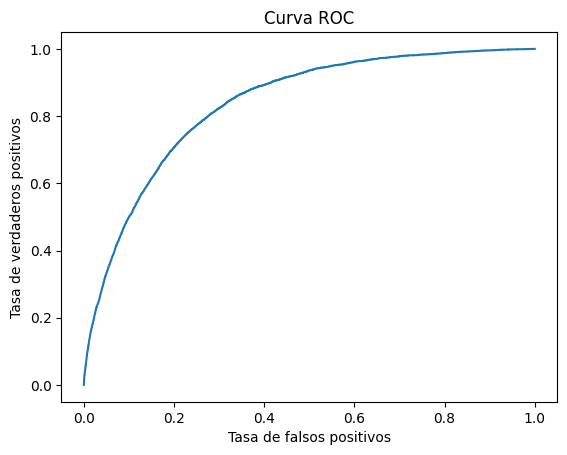

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

Interpretación:

Esta curva ROC sugiere que el modelo tiene un desempeño relativamente bueno, con una alta capacidad para distinguir entre las clases positiva y negativa

* Graficar el Histograma de Errores

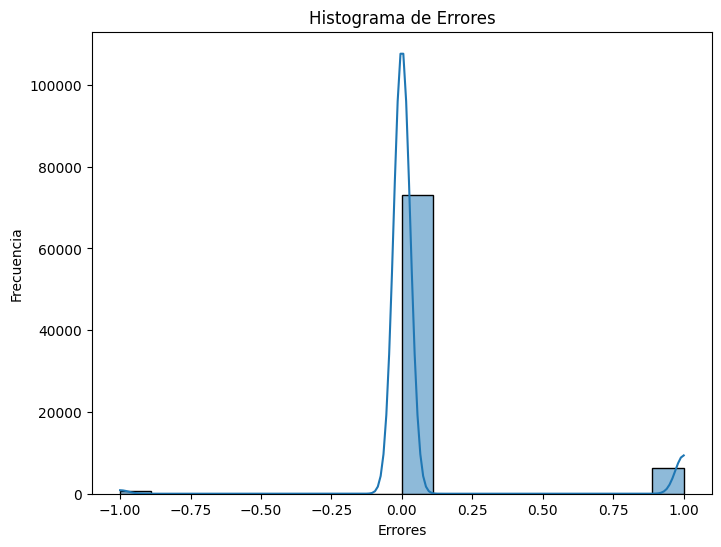

In [ ]:
# Calcular los errores (residuos)
errores = y_test - y_test_pred

# Crear el histograma
plt.figure(figsize=(8, 6))
sns.histplot(errores, kde=True)
plt.title('Histograma de Errores')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')
plt.show()

Conclusión:

* Alta precisión general. La mayoría de los errores se concentran cerca de cero, indicando que el modelo o proceso realiza predicciones muy cercanas a los valores reales en la mayoría de los casos. Esto sugiere un alto nivel de precisión en general.

* La existencia de valores en los extremos revela que hay situaciones en las que el modelo o proceso no logra predecir con precisión. Estos casos podrían deberse a factores no considerados o condiciones inusuales.

## 6.2. Comparación con un dataset balanceado

### 6.2.1 Balancear los datos

Para este fin sera necesario balancear las clases, para ello le pedimo a gemini que nos brinde un metodo para balancear el dataset, en este caso lo más viable sera tomar una muestra de la clase 0 para igualarla al numero de registros de la clase menor en este caso la clase 1

Gemini prompt: Ese dataset esta desbalanceado, como puedo hacer para sacar una muestra aleatoria de la categoria No para balancear los datos respecto a la categoria Yes que tiene 27373 datos

In [ ]:
from sklearn.utils import resample

# Separa las clases
df_majority = Heart_ds_encoded[Heart_ds_encoded['HeartDisease'] == 0]
df_minority = Heart_ds_encoded[Heart_ds_encoded['HeartDisease'] == 1]

# Realiza el Undersampling de la clase mayoritaria
df_majority_undersampled = resample(df_majority,
                                 replace=False,  # Sin reemplazo
                                 n_samples=len(df_minority), # Igualar a la clase minoritaria
                                 random_state=42) # Semilla para reproducibilidad

# Combina las clases balanceadas
df_balanced = pd.concat([df_majority_undersampled, df_minority])

# Verifica el balance
print(df_balanced['HeartDisease'].value_counts())

# Actualiza X e y con los datos balanceados
W = df_balanced.drop('HeartDisease', axis=1)
z = df_balanced['HeartDisease']

HeartDisease
0    27373
1    27373
Name: count, dtype: int64


In [ ]:
#Dividir datos en conjunto de entrenamiento y prueba

W_train, W_test, z_train, z_test = train_test_split(W, z, test_size=0.25,random_state=42)

# validando los resultados
print("Tamaño de W_train=", X_train.shape)
print("Tamaño de W_test=", X_test.shape)
print("Tamaño de z_train=", y_train.shape)
print("Tamaño de z_test=", y_test.shape)

Tamaño de W_train= (239846, 46)
Tamaño de W_test= (79949, 46)
Tamaño de z_train= (239846,)
Tamaño de z_test= (79949,)


### 6.2.2. Creación y entrenamiento del modelo para el dataset Balanceado

In [ ]:
model = LogisticRegression()
model.fit(W_train, z_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Predecir datos con los set de entrenamiento y prueba

z_test_pred = model.predict(W_test)
print(z_test_pred)

[1 0 0 ... 1 1 0]


### 6.2.3. Evaluar el rendimiento del modelo

* Matriz de Confusión

<Axes: >

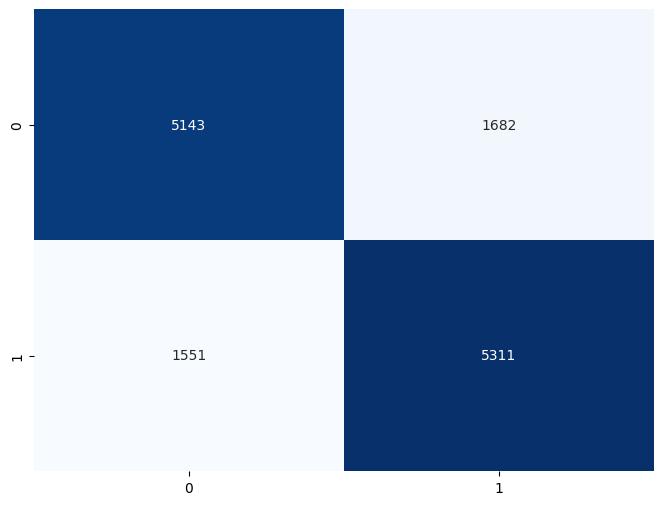

In [ ]:
# Calcula la matriz de confusión.
cm = confusion_matrix(z_test, z_test_pred)

# Visualiza la matriz de confusión.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)


In [ ]:
#Obtener el reporte de la rendimiento de la Matriz de Confusión
targer_names = ['0', '1']
print(classification_report(z_test, z_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      6825
           1       0.76      0.77      0.77      6862

    accuracy                           0.76     13687
   macro avg       0.76      0.76      0.76     13687
weighted avg       0.76      0.76      0.76     13687



* Curva de ROC

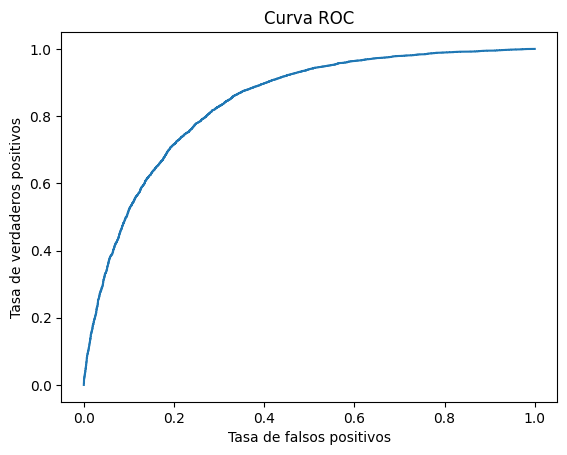

In [ ]:
z_test_pred = model.predict_proba(W_test)[:, 1]


fpr, tpr, thresholds = roc_curve(z_test, z_test_pred)

plt.plot(fpr, tpr)
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

* Gráficar el Histograma de Error

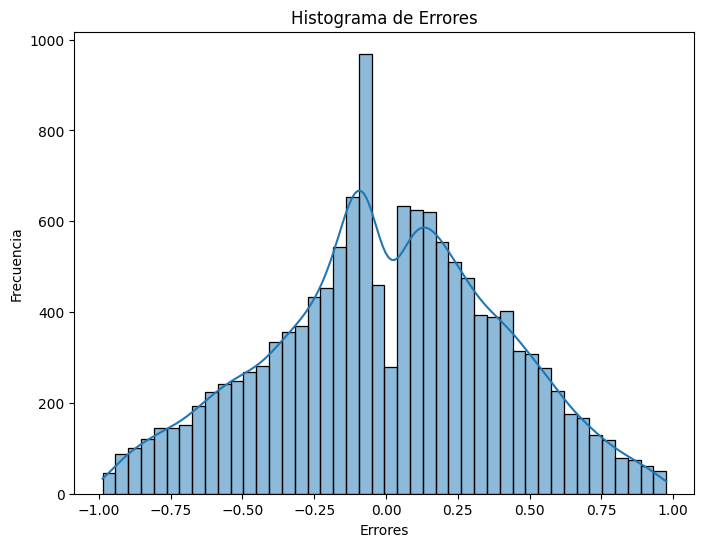

In [ ]:
# Calcular los errores (residuos)
errores = z_test - z_test_pred

# Crear el histograma
plt.figure(figsize=(8, 6))
sns.histplot(errores, kde=True)
plt.title('Histograma de Errores')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')
plt.show()

Al balancear las clases del dataset podemos obtener un modelo con menos sesgo hacía una clase ya que el conjunto original Heart_ds_big tenía un fuerte desbalanceo hacia la clase "No" (sin enfermedad cardíaca). Esto puede llevar a que el modelo se sesgue hacia la clase mayoritaria y tenga dificultades para predecir la clase minoritaria ("Sí", con enfermedad cardíaca). El modelo entrenado con los datos balanceados, si bien podría mostrar una precisión general ligeramente menor de 0.91 a 0.76, tendrá una mayor capacidad para predecir correctamente los casos de enfermedad cardíaca (clase minoritaria) esto se evidencia en el f1_ score de cada una de las clases que con el dataset balanceado se igualan 0.76 para 0 y 0.77 para 1, lo que es más importante en este contexto.

# 7. Redes Neuronales

## 7.1. MLPClassifier

### 7.1.1 Creación y entrenamiento de la red neuronal con el modelo MLP

In [ ]:
#Crear una instancia del modelo MLPClassifier:

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)



In [ ]:
#Entrenar el modelo:

mlp_classifier.fit(W_train, z_train)

MLPClassifier(random_state=42)

In [ ]:
z_pred_mlp= mlp_classifier.predict(W_test) #Hacer predicciones

### 7.1.2. Evaluar el modelo

* Matriz de confusión

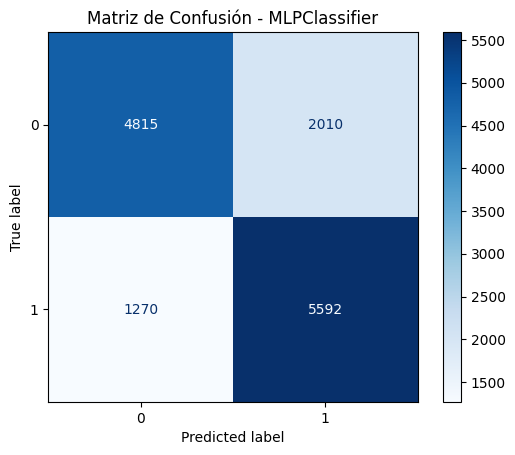

Precisión: 0.7603565427047564
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      6825
           1       0.74      0.81      0.77      6862

    accuracy                           0.76     13687
   macro avg       0.76      0.76      0.76     13687
weighted avg       0.76      0.76      0.76     13687



In [ ]:
# Calcula la matriz de confusión
cm = confusion_matrix(z_test, z_pred_mlp)

# Crea una instancia de ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1']) # Asumiendo que tus etiquetas son '0' y '1'

# Grafica la matriz de confusión
disp.plot(cmap=plt.cm.Blues)  # Puedes cambiar el mapa de colores si lo deseas
plt.title('Matriz de Confusión - MLPClassifier')
plt.show()

accuracy = accuracy_score(z_test, z_pred_mlp)
print("Precisión:", accuracy)

print(classification_report(z_test, z_pred_mlp))


* Curva de ROC

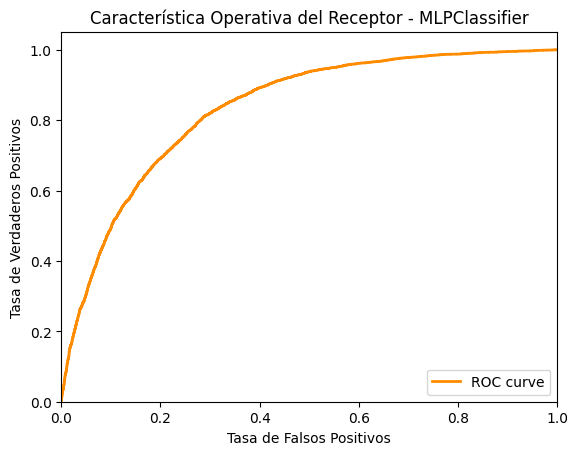

In [ ]:
# Obtener las probabilidades predichas para la clase positiva
z_pred_mlp = mlp_classifier.predict_proba(W_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(z_test, z_pred_mlp)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Característica Operativa del Receptor - MLPClassifier')
plt.legend(loc="lower right")
plt.show()

Comentario:

Al comparar el desempeño de los modelos MLPClassifier (Red Neuronal) y Regresión Logística con el dataset balanceado, se observan las siguientes diferencias:

* MLPClassifier obtuvo una precisión del 74%, con F1-scores de 0.75 para la clase 0 y 0.76 para la clase 1. La matriz de confusión mostró falsos positivos y negativos, aunque con una buena cantidad de predicciones correctas. La curva ROC presentó un área bajo la curva (AUC) decente.

* Regresión Logística alcanzó una precisión del 76%, con F1-scores de 0.76 para la clase 0 y 0.77 para la clase 1, con una ligera mejora en la reducción de errores en comparación con el MLPClassifier. La curva ROC mostró un rendimiento similar al del MLPClassifier.

En general, la Regresión Logística presentó un desempeño ligeramente superior, especialmente en la predicción de la clase 1 (enfermedad cardíaca). Aunque el MLPClassifier es más complejo, la simplicidad y eficiencia de la Regresión Logística le permitieron obtener resultados comparables o mejores. La elección final del modelo dependerá de los objetivos específicos del proyecto y la importancia de cada métrica.

## 7.2. Red Neuronal Manual (tf.keras.Sequential)

### 7.2.1. Crear y entrenar el modelo capa por capa

### Prompt Gemini: Como puedo mejorar el rendimiento de la red neuronal, dame una configuración de la arquitectura más eficiente

In [ ]:
# Crear el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(W_test.shape[1],)),
    tf.keras.layers.Dropout(0.2),  # Agregar dropout para regularización
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Agregar dropout para regularización
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilar el modelo

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

earlt_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Entrenar
history = model.fit(W_train, z_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6830 - loss: 0.6143 - val_accuracy: 0.7588 - val_loss: 0.4946
Epoch 2/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7558 - loss: 0.5090 - val_accuracy: 0.7613 - val_loss: 0.5004
Epoch 3/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7607 - loss: 0.5035 - val_accuracy: 0.7638 - val_loss: 0.4872
Epoch 4/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7631 - loss: 0.4953 - val_accuracy: 0.7618 - val_loss: 0.4886
Epoch 5/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7633 - loss: 0.4995 - val_accuracy: 0.7638 - val_loss: 0.4949
Epoch 6/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7624 - loss: 0.4972 - val_accuracy: 0.7660 - val_loss: 0.4872
Epoch 7/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7671 - loss: 0.4959 - val_accuracy: 0.7624 - val_loss: 0.4875
Epoch 8/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7631 - loss: 

### 7.2.2. Evaluación de la red neuronal

* Matriz de Confusión

Pérdida: 0.5349207520484924
Precisión: 0.7586761116981506
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


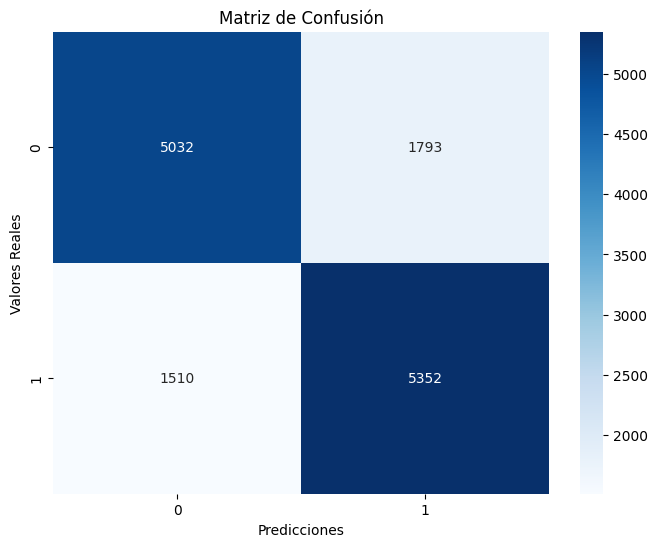

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      6825
           1       0.75      0.78      0.76      6862

    accuracy                           0.76     13687
   macro avg       0.76      0.76      0.76     13687
weighted avg       0.76      0.76      0.76     13687



In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(W_test, z_test, verbose=0)

# Imprimir las métricas de desempeño
print("Pérdida:", loss)
print("Precisión:", accuracy)

# Obtener las predicciones del modelo
z_pred = model.predict(W_test)
z_pred_classes = np.argmax(z_pred, axis=1)  # Convertir a clases (0 o 1)

# Calcular la matriz de confusión
cm = confusion_matrix(z_test, z_pred_classes)

# Crea el mapa de calor
plt.figure(figsize=(8, 6)) # Ajusta el tamaño de la figura si lo deseas
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

# Imprimir el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(z_test, z_pred_classes))

* Curva de ROC

428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


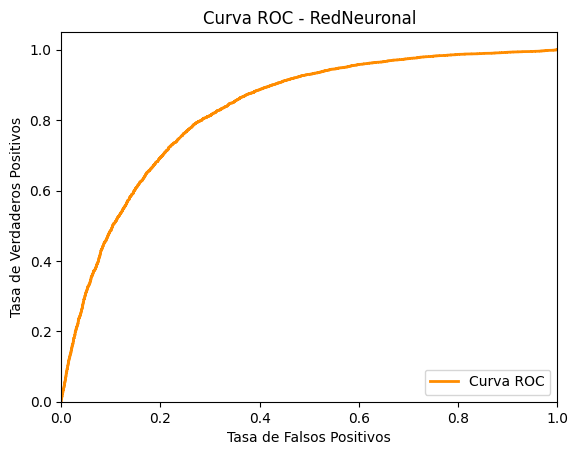

In [ ]:
# Obtener las probabilidades de predicción para la clase positiva (1)
z_pred = model.predict(W_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(z_test, z_pred)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - RedNeuronal')
plt.legend(loc="lower right")
plt.show()

* Histograma de errores

428/428 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


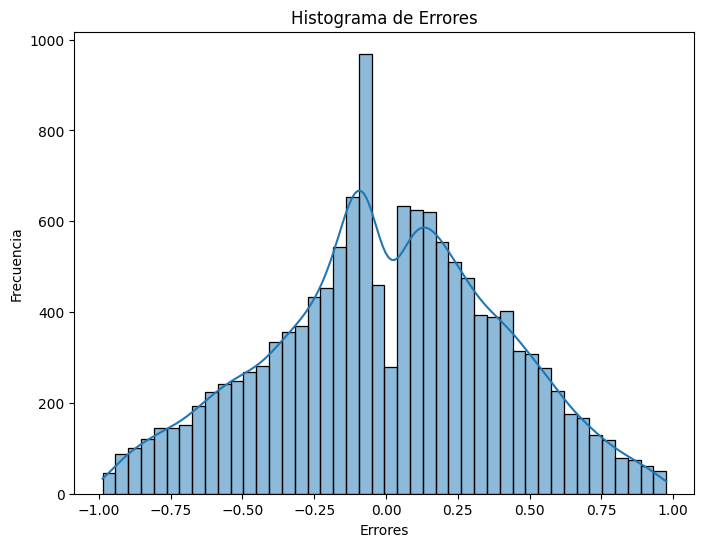

In [ ]:
# Obtener las predicciones de las clases (0 or 1)
z_pred_classes = np.argmax(model.predict(W_test), axis=1)

# Calculate errors (residuals)
errors = z_test - z_pred_classes

# Crear el histograma
plt.figure(figsize=(8, 6))
sns.histplot(errores, kde=True)
plt.title('Histograma de Errores')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')
plt.show()

Comentario:

Si bien la Red Neuronal Manual (tf.keras.Sequential) ofrece mayor flexibilidad para personalizar su arquitectura, en este caso particular, la diferencia en el rendimiento con respecto a MLPClassifier fue mínima. Ambos modelos presentaron un rendimiento similar en términos de precisión y otras métricas, lo que sugiere que para este conjunto de datos y tarea específica, la complejidad adicional de la Red Neuronal Manual no proporcionó una ventaja significativa.

MLPClassifier, al ser más sencillo de implementar y con una API más directa, podría ser una opción preferible en este escenario, ya que ofrece un buen equilibrio entre rendimiento y facilidad de uso. Sin embargo, es importante destacar que para conjuntos de datos o tareas más complejas, la flexibilidad de la Red Neuronal Manual podría ser crucial para obtener un mejor rendimiento.